In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
warnings.filterwarnings("ignore")

In [3]:
loan_data = pd.read_csv('loan_train.csv')

In [4]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [5]:
loan_data.shape

(614, 12)

In [6]:
loan_data.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [7]:
## percentage of null values
def null_values(x):
    column_with_null_values = {}
    for i in x:
        # print(i)
        if (loan_data[i].isna().sum()!=0):
            # print(i)
            column_with_null_values[i] = round((loan_data[i].isna().sum()/len(loan_data))*100,2)
            # return(f'{i} {round((application_data[i].isna().sum()/len(application_data))*100,2)}')
            
    return column_with_null_values

null_values(loan_data.columns)

{'Gender': 2.12,
 'Married': 0.49,
 'Dependents': 2.44,
 'Self_Employed': 5.21,
 'Term': 2.28,
 'Credit_History': 8.14}

In [8]:
## find the value count of each categorical variable we have
categorical_columns = [loan_data[i].name  for i in loan_data.columns if loan_data[i].dtype=='object']

for i in loan_data.columns:
    if i in categorical_columns:
        print(loan_data[i].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Area, dtype: int64
Y    422
N    192
Name: Status, dtype: int64


In [9]:
# percentage of the categorical variables
for i in loan_data.columns:
    if i in categorical_columns:
        print((loan_data[i].value_counts())/len(loan_data) *100)

Male      79.641694
Female    18.241042
Name: Gender, dtype: float64
Yes    64.820847
No     34.690554
Name: Married, dtype: float64
0     56.188925
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64
Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64
No     81.433225
Yes    13.355049
Name: Self_Employed, dtype: float64
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Area, dtype: float64
Y    68.729642
N    31.270358
Name: Status, dtype: float64


With the above we'll find that more of the males have applied for the Loan when compared to females.

Those who are married, having a graduate degree, not self-employed and are from semi-urban areas are the most applied for Loan.

68% of the loan status has been approved and 31% of the loan has not been approved.

<Axes: ylabel='Status'>

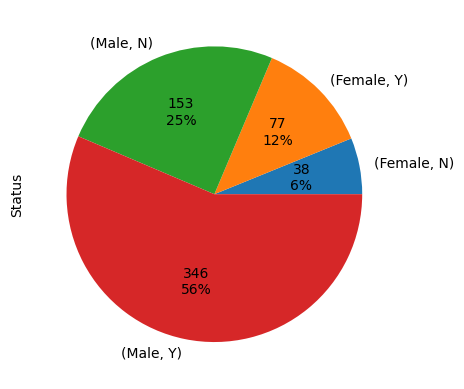

In [10]:
# find for how many males and females the loan gets approved.
def labelling(val):
    return f'{val / 100 * len(loan_data):.0f}\n{val:.0f}%'
loan_data.groupby(['Gender','Status'])['Status'].count().plot(kind='pie',autopct=labelling)


Based on the above graph we can conclude that loan has been approved for 56% of the males and 12% for the females.

25% of the males have been rejected for the loan and 6% of the females have been rejected for the approval of loan.

<Axes: ylabel='Status'>

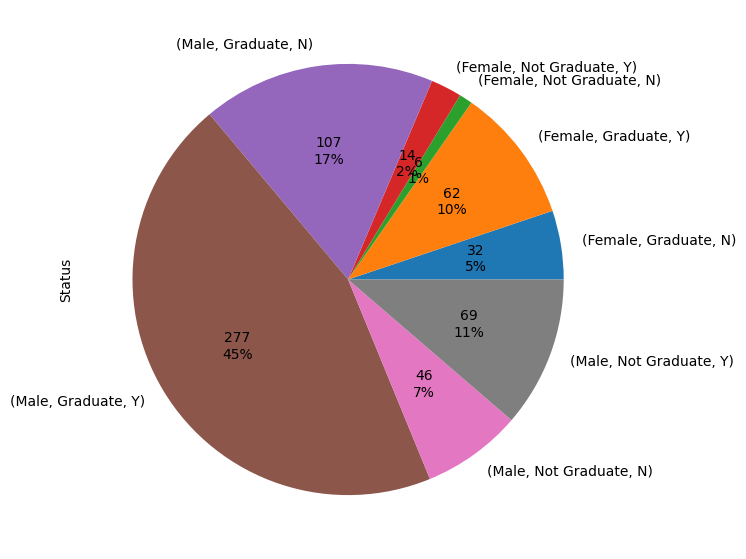

In [11]:
## other than the gender let's find out how many of males and females are graduated and loan have been approved
plt.figure(figsize=(12,7))
loan_data.groupby(['Gender','Education','Status'])['Status'].count().plot(kind='pie',autopct=labelling)

45% of the graduated males have applied for the loan and their loan gets approved as well.

Even for the females we'll able to observe that graduated females have applied for the loan and their loan gets approved as well. 

The sample we got has more of the males who have applied for the loan as compared to females.

<Axes: ylabel='Status'>

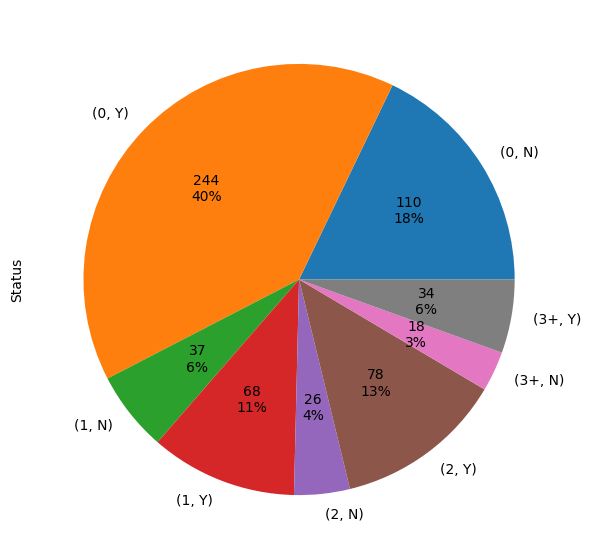

In [12]:
## let's find the loan approval status for sub-categories of dependents
## as maximum people with zero dependency have applied for the loan.
plt.figure(figsize=(12,7))
loan_data.groupby(['Dependents','Status'])['Status'].count().plot(kind='pie',autopct=labelling)


Maximum percentage of approx. 40% loan has been approved for those who doesn't have any dependency followed by who have 2 people dependent on them.

Least approval are for those who have more than 3 people dependent on them.

<Axes: ylabel='Status'>

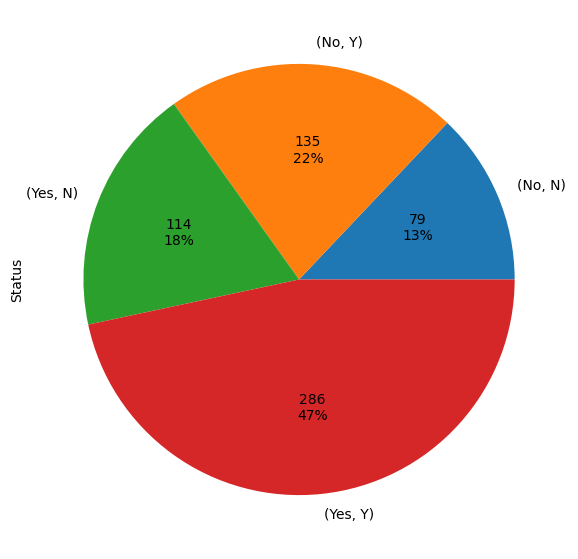

In [13]:
plt.figure(figsize=(12,7))
loan_data.groupby(['Married','Status'])['Status'].count().plot(kind='pie',autopct=labelling)

<Axes: ylabel='Status'>

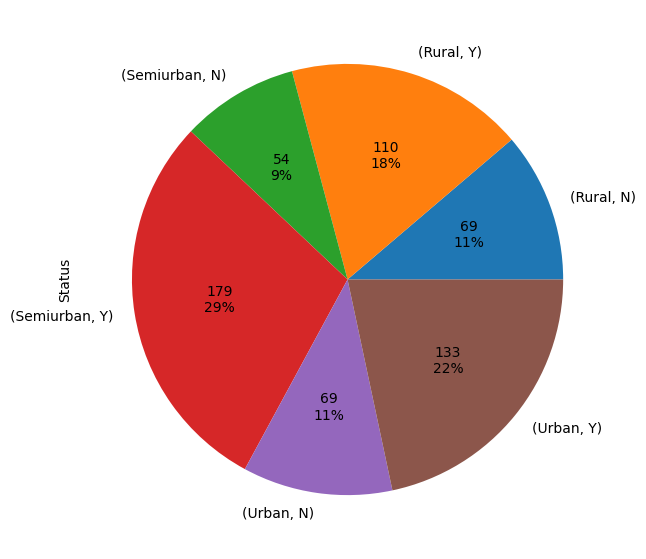

In [14]:
plt.figure(figsize=(12,7))
loan_data.groupby(['Area','Status'])['Status'].count().plot(kind='pie',autopct=labelling)

In [15]:
loan_data.groupby(['Status']).agg('mean')

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
Status,,,,,
N,544607.812500,187780.729167,1.425573e+07,344.064516,0.541899
Y,538406.872038,150451.639808,1.408886e+07,341.072464,0.981818


In [16]:
## find out the average income for both the Genders based on which there application gets approved or not
loan_data.pivot_table(index=['Gender','Status'],values='Applicant_Income',aggfunc=['mean','min','max'])

mean              min              max
              Applicant_Income Applicant_Income Applicant_Income
Gender Status                                                   
Female N         409135.135135            41600          1150000
       Y         491585.333333            21000          1948400
Male   N         585924.000000            15000          8100000
       Y         526381.415929           102500          6333700

In [17]:
loan_data.pivot_table(index=['Gender','Status'],values='Loan_Amount',aggfunc=['mean','min','max'])

mean         min         max
                Loan_Amount Loan_Amount Loan_Amount
Gender Status                                      
Female N       1.252162e+07           0    35000000
       Y       1.223600e+07           0    60000000
Male   N       1.473533e+07           0    57000000
       Y       1.421888e+07           0    65000000

<Axes: xlabel='Loan_Amount', ylabel='Applicant_Income'>

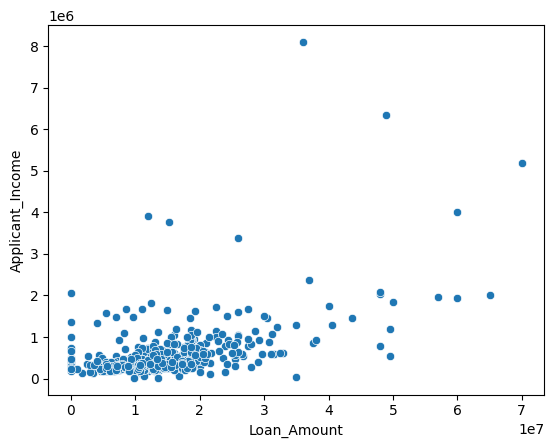

In [18]:
sns.scatterplot(x=loan_data.Loan_Amount,y=loan_data.Applicant_Income)

<Axes: xlabel='Gender', ylabel='Applicant_Income'>

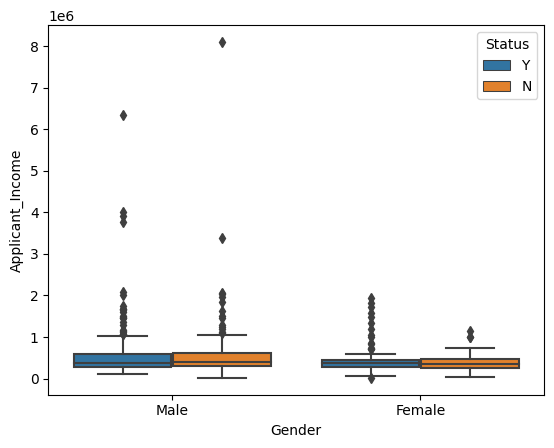

In [19]:
sns.boxplot(data=loan_data,x='Gender',y='Applicant_Income',hue='Status')

<Axes: xlabel='Dependents', ylabel='Loan_Amount'>

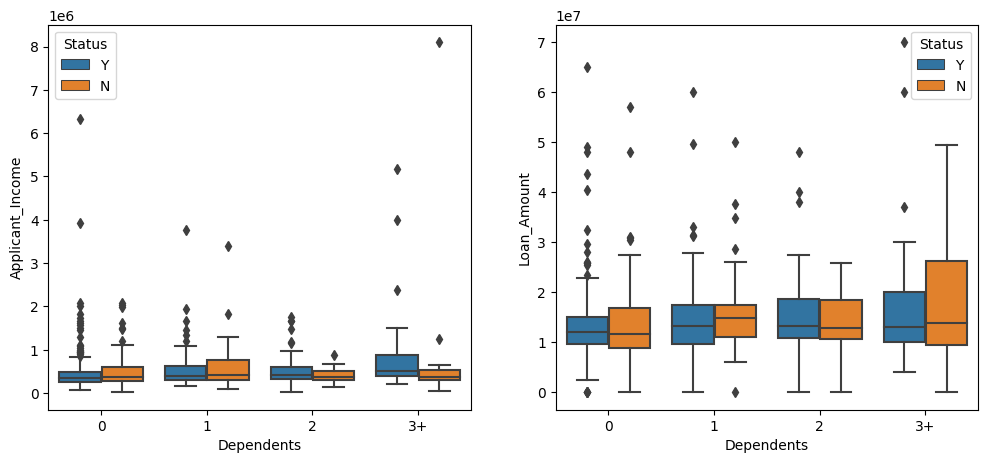

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(data=loan_data,x='Dependents',y='Applicant_Income',hue='Status')

plt.subplot(122)
sns.boxplot(data=loan_data,x='Dependents',y='Loan_Amount',hue='Status')

<Axes: xlabel='Education', ylabel='Applicant_Income'>

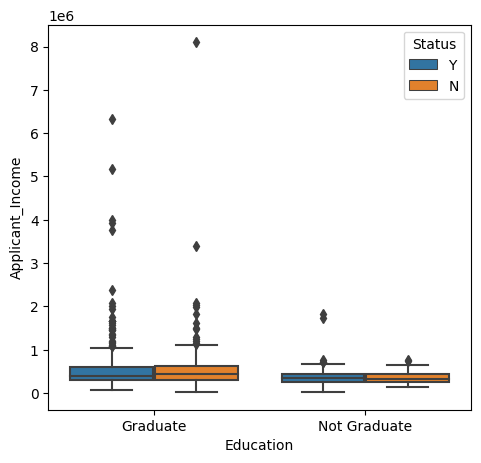

In [21]:
loan_data.head()
## based on education what is the applicants income and what is the loan status
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(data=loan_data,x='Education',y='Applicant_Income',hue='Status')

In [22]:
## look for the values which are nan and also where the values are 0 for the loan_amount as well

# loan_data[loan_data.isna().any(axis=1)]
loan_data[loan_data.Status=='N']

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
7,Male,Yes,3+,Graduate,No,303600,250400.0,15800000,360.0,0.0,Semiurban,N
9,Male,Yes,1,Graduate,No,1284100,1096800.0,34900000,360.0,1.0,Semiurban,N
13,Male,No,0,Graduate,No,185300,284000.0,11400000,360.0,1.0,Rural,N
17,Female,No,0,Graduate,No,351000,0.0,7600000,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
596,Male,Yes,2,Not Graduate,Yes,638300,100000.0,18700000,360.0,1.0,Rural,N
597,Male,No,NaN,Graduate,No,298700,0.0,8800000,360.0,0.0,Semiurban,N
600,Female,No,3+,Graduate,NaN,41600,4166700.0,35000000,180.0,NaN,Urban,N
605,Male,Yes,0,Not Graduate,No,240000,380000.0,0,180.0,1.0,Urban,N


<Axes: >

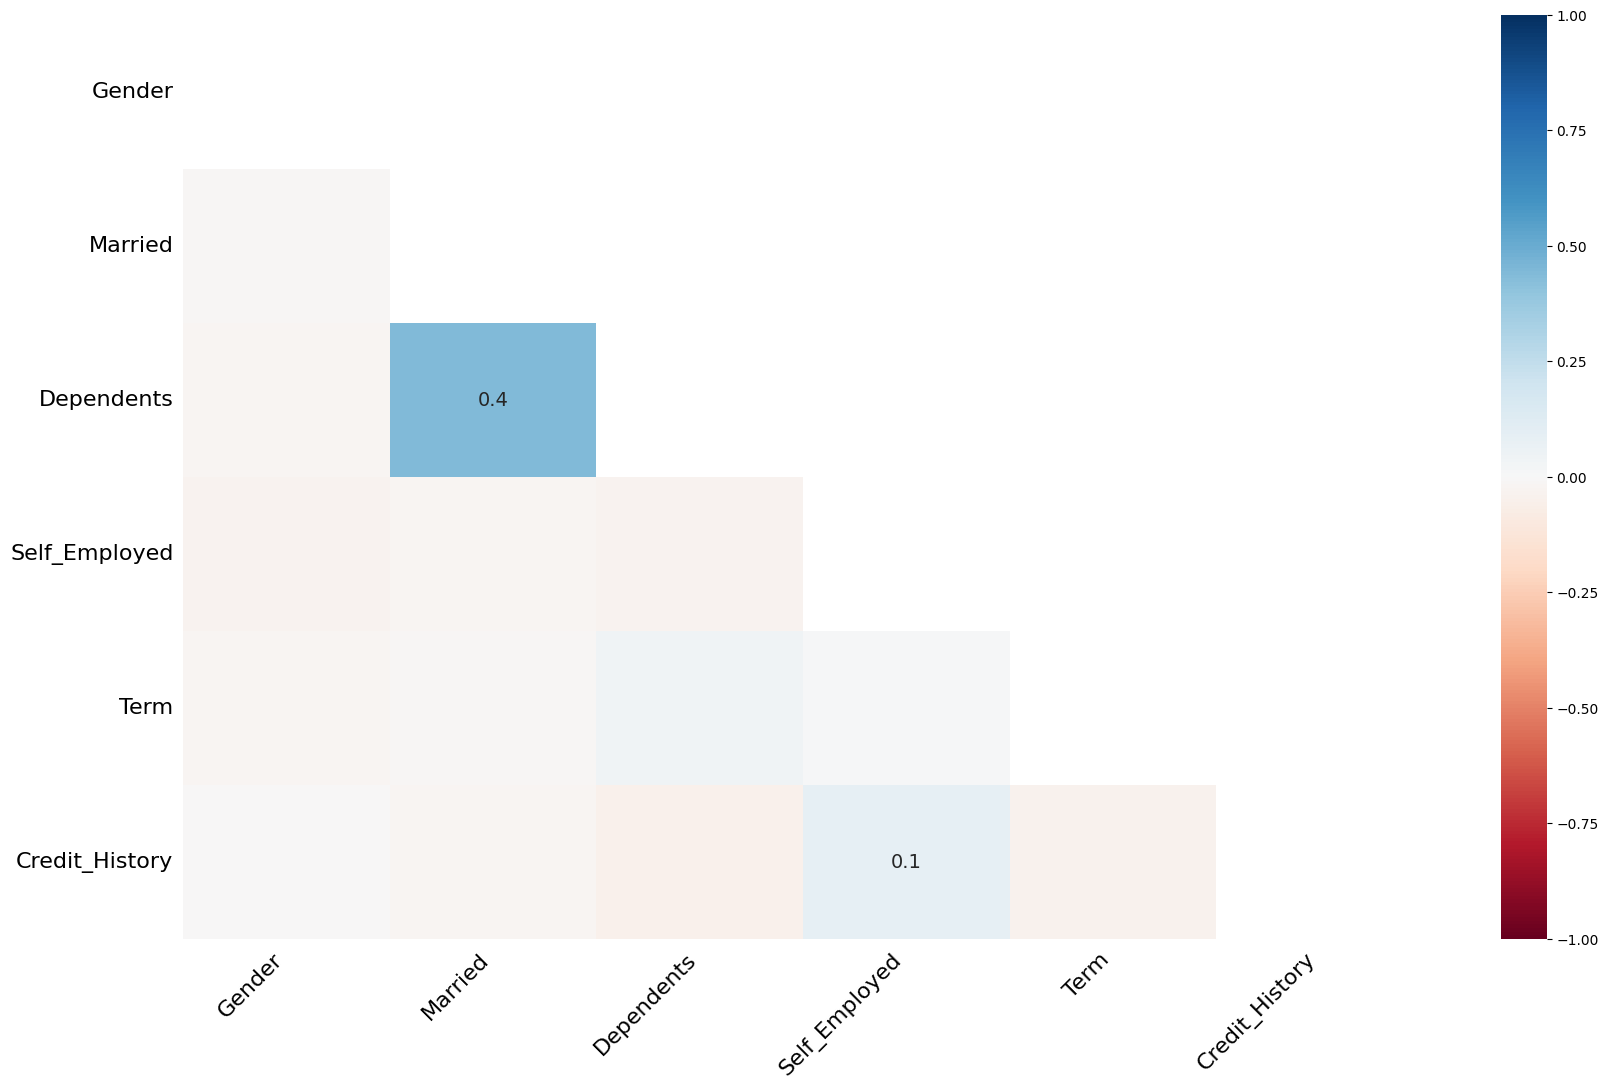

In [23]:
# look for null values in the dataset
# {'Gender': 2.12,
#  'Married': 0.49,
#  'Dependents': 2.44,
#  'Self_Employed': 5.21,
#  'Term': 2.28,
#  'Credit_History': 8.14}

# Find missing values correlation in the data that we are observing
import missingno as mns
mns.heatmap(loan_data,labels=True)

In [24]:
## before imputing the values we first encode our text labelled data that we have
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
def encoder_func(data):
    non_na = np.array(data.dropna())
    reshape_array = non_na.reshape(-1,1)
    # print(reshape_array)
    impute_encoder = encoder.fit_transform(reshape_array)
    data.loc[data.notnull()]=np.squeeze(impute_encoder)
    return data


In [25]:
loan_data2=loan_data.copy()

In [26]:
cat_cols= [i for i in loan_data.columns if loan_data[i].dtype=='object']    

In [27]:
for columns in cat_cols:
    encoder_func(loan_data2[columns])

In [28]:
loan_data2

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1.0,0.0,0.0,0.0,0.0,584900,0.0,15000000,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,458300,150800.0,12800000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,300000,0.0,6600000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,258300,235800.0,12000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,600000,0.0,14100000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,290000,0.0,7100000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,410600,0.0,4000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,807200,24000.0,25300000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,758300,0.0,18700000,360.0,1.0,2.0,1.0


In [29]:
# loan_data2.loc[loan_data2['Loan_Amount']==0,'Loan_Amount']=np.nan

In [29]:
loan_data2[loan_data2.Loan_Amount==0]= np.nan


In [30]:
## converting the text data to encoded one we can now use the imputation using KNN
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3)
encoded_impute_data = pd.DataFrame(np.round(knn.fit_transform(loan_data2)),columns=loan_data2.columns)
encoded_impute_data

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1.0,0.0,0.0,0.0,0.0,584900.0,0.0,15000000.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,458300.0,150800.0,12800000.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,300000.0,0.0,6600000.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,258300.0,235800.0,12000000.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,600000.0,0.0,14100000.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,290000.0,0.0,7100000.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,410600.0,0.0,4000000.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,807200.0,24000.0,25300000.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,758300.0,0.0,18700000.0,360.0,1.0,2.0,1.0


In [31]:
encoded_impute_data.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [32]:
encoded_impute_data[cat_cols]= encoded_impute_data[cat_cols].astype('category')

In [33]:
# encoded_impute_data.dtypes
encoded_impute_data.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,341.908795,0.850163
std,6.109042e+05,2.926248e+05,8.815682e+06,64.669657,0.357203
min,1.500000e+04,0.000000e+00,0.000000e+00,12.000000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.000000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.000000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.000000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.000000,1.000000


In [34]:
encoded_impute_data['Credit_History']= encoded_impute_data['Credit_History'].astype('category')

In [35]:
encoded_impute_data.Status.value_counts()

1.0    422
0.0    192
Name: Status, dtype: int64

<Axes: xlabel='Credit_History', ylabel='Loan_Amount'>

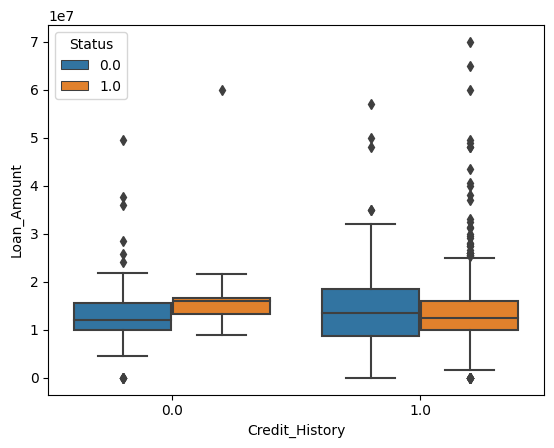

In [36]:
sns.boxplot(data=encoded_impute_data,x='Credit_History',y='Loan_Amount',hue='Status')

<Axes: xlabel='Loan_Amount', ylabel='Density'>

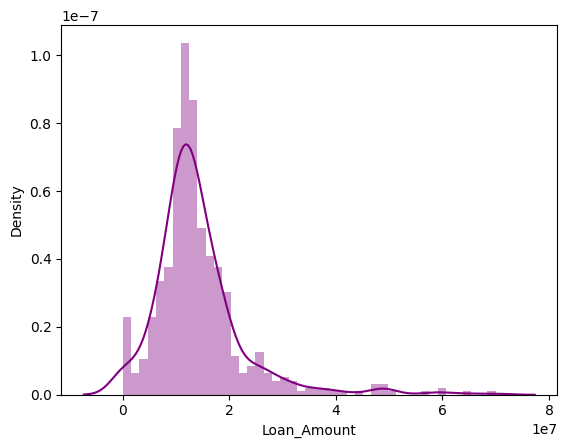

In [37]:
sns.distplot(encoded_impute_data["Loan_Amount"],color='purple')

In [38]:
encoded_impute_data.Gender.value_counts()

1.0    502
0.0    112
Name: Gender, dtype: int64

In [39]:
encoded_impute_data.pivot_table(index=['Gender','Status'],values='Applicant_Income',aggfunc=['mean','min','max'])

mean              min              max
              Applicant_Income Applicant_Income Applicant_Income
Gender Status                                                   
0.0    0.0       409135.135135          41600.0        1150000.0
       1.0       491585.333333          21000.0        1948400.0
1.0    0.0       576946.451613          15000.0        8100000.0
       1.0       548526.801153          67400.0        6333700.0

In [40]:
encoded_impute_data.pivot_table(index=['Gender','Status'],values='Loan_Amount',aggfunc=['mean','min','max'])

mean         min         max
                Loan_Amount Loan_Amount Loan_Amount
Gender Status                                      
0.0    0.0     1.252162e+07         0.0  35000000.0
       1.0     1.223600e+07         0.0  60000000.0
1.0    0.0     1.466968e+07         0.0  57000000.0
       1.0     1.448934e+07         0.0  70000000.0

In [41]:
encoded_impute_data['Total_income'] = encoded_impute_data.Applicant_Income+encoded_impute_data.Coapplicant_Income
encoded_impute_data['monthly_debt']=encoded_impute_data['Loan_Amount']/encoded_impute_data['Term']

In [41]:
encoded_impute_data2=encoded_impute_data.copy()
encoded_impute_data2.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1.0,0.0,0.0,0.0,0.0,584900.0,0.0,15000000.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,458300.0,150800.0,12800000.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,300000.0,0.0,6600000.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,258300.0,235800.0,12000000.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,600000.0,0.0,14100000.0,360.0,1.0,2.0,1.0


In [42]:
encoded_impute_data2.groupby(['Status']).agg('mean')

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term
Status,,,,
0.0,544607.812500,187780.729167,1.425573e+07,344.000000
1.0,538406.872038,150451.639810,1.408886e+07,340.957346


<Axes: >

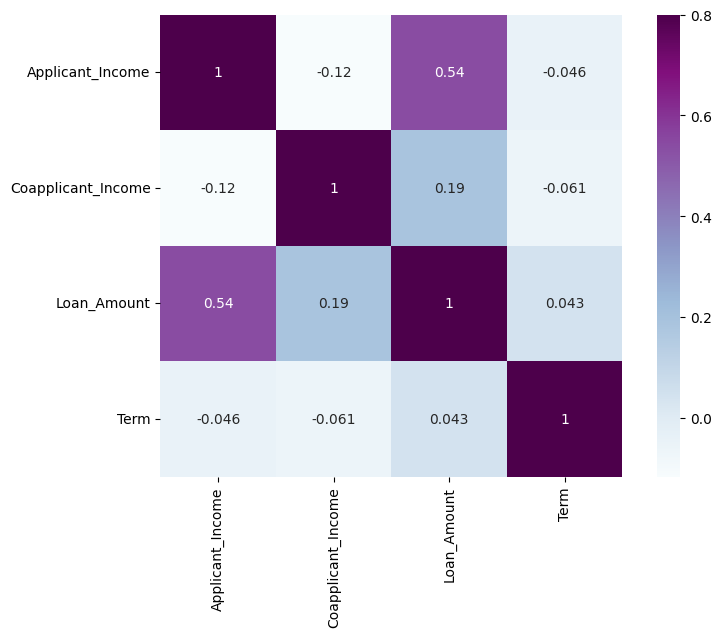

In [43]:
matrix = encoded_impute_data2.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

In [44]:
# encoded_impute_data2.drop(columns='Applicant_Income',inplace=True)

In [45]:
# matrix = encoded_impute_data2.corr()
# f, ax = plt.subplots(figsize=(9,6))
# sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

In [46]:
## transform the loan_amount, coapplicant_income,total and monthly-debt income
# encoded_impute_data2['Loan_Amount'] = np.log(encoded_impute_data2['Loan_Amount'])
encoded_impute_data2['Loan_Amount']=np.where(encoded_impute_data2['Loan_Amount']!=0,np.log(encoded_impute_data2['Loan_Amount']),0)
encoded_impute_data2['Coapplicant_Income'] =np.where(encoded_impute_data2['Coapplicant_Income']!=0,np.log(encoded_impute_data2['Coapplicant_Income']),0)
# encoded_impute_data2['monthly_debt']=np.log(encoded_impute_data2['monthly_debt'])
encoded_impute_data2['Term']=np.log(encoded_impute_data2.Term)

In [47]:
# encoded_impute_data2['Total_income'] = np.log(encoded_impute_data2['Total_income'])
encoded_impute_data2['Applicant_Income'] = np.log(encoded_impute_data2['Applicant_Income'])
encoded_impute_data2

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1.0,0.0,0.0,0.0,0.0,13.279196,0.000000,16.523561,5.886104,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,13.035279,11.923710,16.364956,5.886104,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,12.611538,0.000000,15.702580,5.886104,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,12.461877,12.370739,16.300417,5.886104,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,13.304685,0.000000,16.461685,5.886104,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,12.577636,0.000000,15.775605,5.886104,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,12.925375,0.000000,15.201805,5.192957,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,13.601327,10.085809,17.046315,5.886104,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,13.538834,0.000000,16.744034,5.886104,1.0,2.0,1.0


In [48]:
X = encoded_impute_data2.drop('Status',axis=1)
y= encoded_impute_data2.Status

In [49]:
train_data = pd.get_dummies(X,drop_first=True)

In [50]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [51]:
# feature_numeric = ['Coapplicant_Income','Loan_Amount','Term','Total_income','monthly_debt',]  
# features = scaler.fit_transform(train_data[feature_numeric])
# train_data[feature_numeric]=features

In [52]:
train_data.head()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Gender_1.0,Married_1.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_1.0,Self_Employed_1.0,Credit_History_1.0,Area_1.0,Area_2.0
0,13.279196,0.000000,16.523561,5.886104,1,0,0,0,0,0,0,1,0,1
1,13.035279,11.923710,16.364956,5.886104,1,1,1,0,0,0,0,1,0,0
2,12.611538,0.000000,15.702580,5.886104,1,1,0,0,0,0,1,1,0,1
3,12.461877,12.370739,16.300417,5.886104,1,1,0,0,0,1,0,1,0,1
4,13.304685,0.000000,16.461685,5.886104,1,0,0,0,0,0,0,1,0,1


In [53]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Status, Length: 614, dtype: category
Categories (2, float64): [0.0, 1.0]

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_data,y,test_size=0.3,random_state=123)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(429, 14) (185, 14) (429,) (185,)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report


In [56]:
X_train

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Gender_1.0,Married_1.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_1.0,Self_Employed_1.0,Credit_History_1.0,Area_1.0,Area_2.0
105,12.628723,11.542484,16.118096,5.886104,1,1,1,0,0,0,0,1,0,1
471,12.488617,11.918391,16.240313,5.192957,1,1,1,0,0,1,0,0,0,0
114,13.132314,0.000000,16.283610,5.886104,1,0,0,0,0,0,0,1,1,0
91,13.345507,13.245289,16.749367,5.192957,1,1,0,1,0,0,0,1,1,0
562,13.291769,12.232715,16.864784,5.886104,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,12.945149,0.000000,16.257858,5.192957,1,1,0,0,0,1,0,1,1,0
322,12.794137,11.976659,0.000000,5.886104,1,1,0,1,0,1,0,1,0,0
382,13.304685,0.000000,16.562781,5.886104,0,0,0,0,0,0,0,1,0,1
365,13.340052,0.000000,16.403275,5.886104,1,0,0,0,0,1,0,1,0,0


In [57]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)

LogisticRegression()

In [58]:
y_pred = logit_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.772972972972973


In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.39      0.54        64
         1.0       0.75      0.98      0.85       121

    accuracy                           0.77       185
   macro avg       0.82      0.68      0.70       185
weighted avg       0.80      0.77      0.74       185



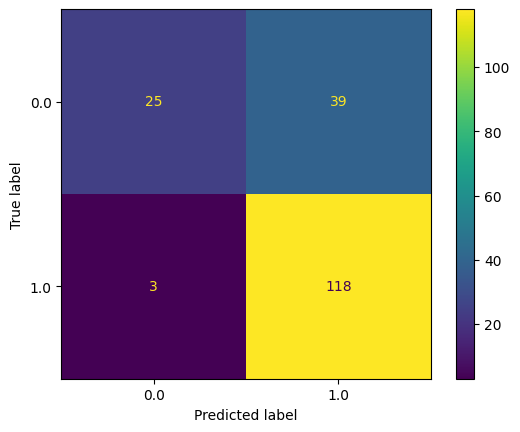

In [60]:
cm = confusion_matrix(y_test, y_pred, labels= logit_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= logit_model.classes_)
disp.plot()
plt.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [62]:
extra_tree_classifier = ExtraTreesClassifier()
extra_tree_classifier.fit(X_train,y_train)
y_pred_extra_tree = extra_tree_classifier.predict(X_test)
print(accuracy_score(y_test,y_pred_extra_tree))

0.7189189189189189


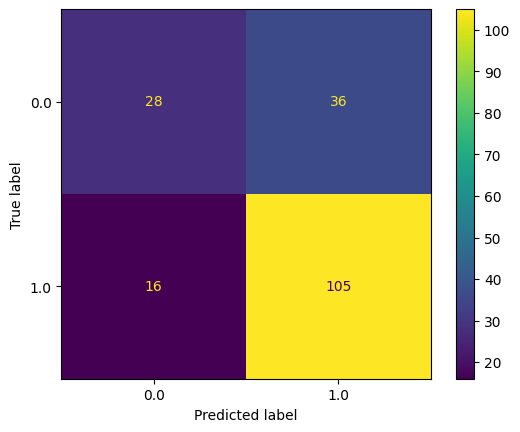

In [63]:
cm = confusion_matrix(y_test, y_pred_extra_tree, labels= extra_tree_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= extra_tree_classifier.classes_)
disp.plot()
plt.show()

In [64]:
print(classification_report(y_test,y_pred_extra_tree))

              precision    recall  f1-score   support

         0.0       0.64      0.44      0.52        64
         1.0       0.74      0.87      0.80       121

    accuracy                           0.72       185
   macro avg       0.69      0.65      0.66       185
weighted avg       0.71      0.72      0.70       185



In [65]:
random_classifier = RandomForestClassifier()
random_classifier.fit(X_train,y_train)
y_pred_random = random_classifier.predict(X_test)
print(accuracy_score(y_test,y_pred_random))

0.7675675675675676


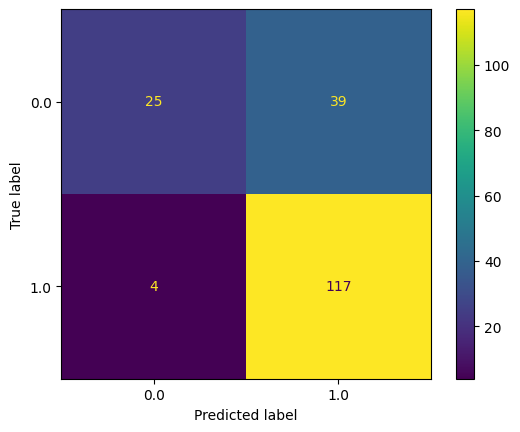

In [66]:
cm = confusion_matrix(y_test, y_pred_random, labels= random_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= random_classifier.classes_)
disp.plot()
plt.show()

In [67]:
from imblearn.over_sampling import ADASYN
# adasyn =  ADASYN(sampling_strategy='minority',random_state=0)
#fit ADASYN on original X and y and define resample X and y
X_bal,y_bal = ADASYN(sampling_strategy='minority',random_state=0).fit_resample(X_train,y_train)

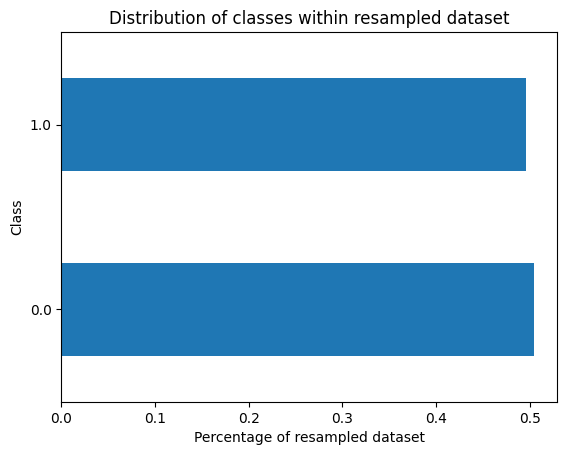

In [68]:
resample = pd.Series(y_bal.value_counts(normalize = True))
ax = resample.plot.barh()
ax.set(title = "Distribution of classes within resampled dataset", xlabel = "Percentage of resampled dataset", ylabel = "Class")
plt.show();

In [69]:
X_bal

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Gender_1.0,Married_1.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_1.0,Self_Employed_1.0,Credit_History_1.0,Area_1.0,Area_2.0
0,12.628723,11.542484,16.118096,5.886104,1,1,1,0,0,0,0,1,0,1
1,12.488617,11.918391,16.240313,5.192957,1,1,1,0,0,1,0,0,0,0
2,13.132314,0.000000,16.283610,5.886104,1,0,0,0,0,0,0,1,1,0
3,13.345507,13.245289,16.749367,5.192957,1,1,0,1,0,0,0,1,1,0
4,13.291769,12.232715,16.864784,5.886104,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,12.764985,0.000000,15.844374,5.881129,0,0,0,0,0,0,0,0,0,1
603,12.905966,0.000000,16.021334,5.788842,1,0,0,0,0,1,0,1,0,0
604,13.331556,0.000000,16.358983,5.886104,1,0,0,0,0,1,0,0,0,0
605,12.778706,11.824273,15.590289,5.886104,1,0,0,0,0,0,0,1,0,0


In [70]:
Xre_train, Xre_test, yre_train, yre_test = train_test_split(X_bal, y_bal)
extra_re = ExtraTreesClassifier()
extra_re.fit(Xre_train, yre_train)
predictions = extra_re.predict(Xre_test)
print(classification_report(yre_test, predictions))

              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77        70
         1.0       0.83      0.72      0.77        82

    accuracy                           0.77       152
   macro avg       0.77      0.77      0.77       152
weighted avg       0.78      0.77      0.77       152



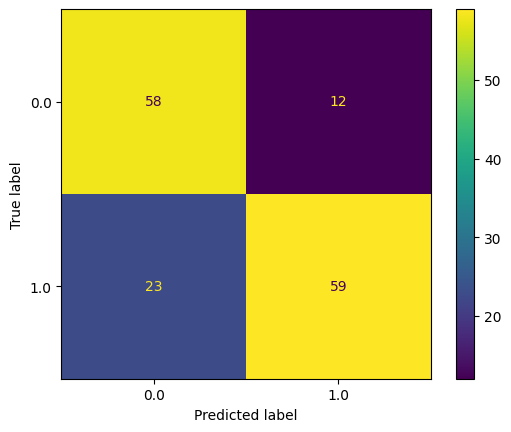

In [71]:
disp = ConfusionMatrixDisplay.from_estimator(extra_re, Xre_test,yre_test)
plt.show();

In [93]:
## adding extra features in the dataset and try using ExtraTree Classifier
encoded_impute_data.head()


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status,Total_income,monthly_debt
0,1.0,0.0,0.0,0.0,0.0,584900.0,0.0,15000000.0,360.0,1.0,2.0,1.0,584900.0,41666.666667
1,1.0,1.0,1.0,0.0,0.0,458300.0,150800.0,12800000.0,360.0,1.0,0.0,0.0,609100.0,35555.555556
2,1.0,1.0,0.0,0.0,1.0,300000.0,0.0,6600000.0,360.0,1.0,2.0,1.0,300000.0,18333.333333
3,1.0,1.0,0.0,1.0,0.0,258300.0,235800.0,12000000.0,360.0,1.0,2.0,1.0,494100.0,33333.333333
4,1.0,0.0,0.0,0.0,0.0,600000.0,0.0,14100000.0,360.0,1.0,2.0,1.0,600000.0,39166.666667


In [94]:
encoded_impute_data['Total_income'] = encoded_impute_data.Applicant_Income+encoded_impute_data.Coapplicant_Income
encoded_impute_data['monthly_debt']=encoded_impute_data['Loan_Amount']/encoded_impute_data['Term']

<Axes: >

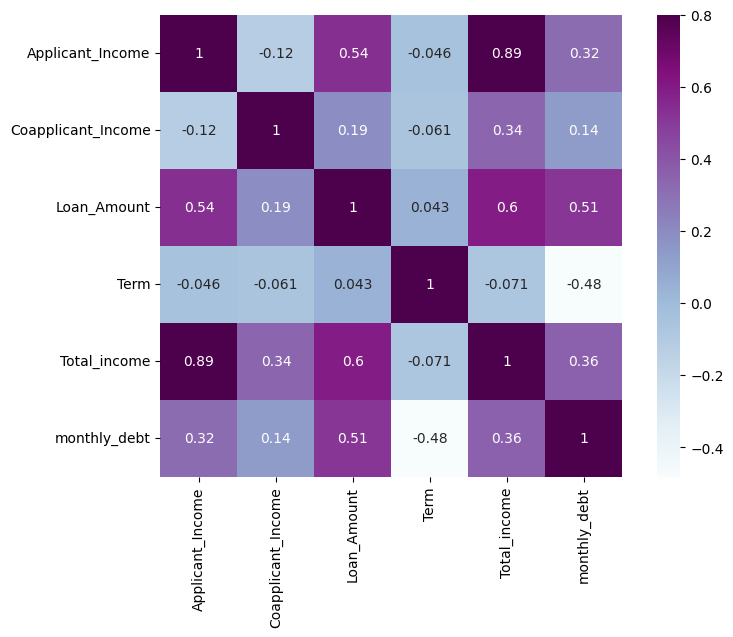

In [95]:
matrix = encoded_impute_data.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

In [106]:
encoded_impute_data3 = encoded_impute_data.copy()

In [107]:
encoded_impute_data3.drop(columns='Applicant_Income',inplace=True)

In [108]:
## transform the loan_amount, coapplicant_income,total and monthly-debt income
# encoded_impute_data2['Loan_Amount'] = np.log(encoded_impute_data2['Loan_Amount'])
encoded_impute_data3['Loan_Amount']=np.where(encoded_impute_data3['Loan_Amount']!=0,np.log(encoded_impute_data3['Loan_Amount']),0)
encoded_impute_data3['Coapplicant_Income'] =np.where(encoded_impute_data3['Coapplicant_Income']!=0,np.log(encoded_impute_data3['Coapplicant_Income']),0)
encoded_impute_data3['monthly_debt']=np.log(encoded_impute_data3['monthly_debt'])
encoded_impute_data3['Term']=np.log(encoded_impute_data3.Term)
encoded_impute_data3['Total_income']=np.log(encoded_impute_data3.Total_income)
encoded_impute_data3

,Gender,Married,Dependents,Education,Self_Employed,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status,Total_income,monthly_debt
0,1.0,0.0,0.0,0.0,0.0,0.000000,16.523561,5.886104,1.0,2.0,1.0,13.279196,10.637457
1,1.0,1.0,1.0,0.0,0.0,11.923710,16.364956,5.886104,1.0,0.0,0.0,13.319738,10.478852
2,1.0,1.0,0.0,0.0,1.0,0.000000,15.702580,5.886104,1.0,2.0,1.0,12.611538,9.816476
3,1.0,1.0,0.0,1.0,0.0,12.370739,16.300417,5.886104,1.0,2.0,1.0,13.110493,10.414313
4,1.0,0.0,0.0,0.0,0.0,0.000000,16.461685,5.886104,1.0,2.0,1.0,13.304685,10.575581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,0.000000,15.775605,5.886104,1.0,0.0,1.0,12.577636,9.889501
610,1.0,1.0,3.0,0.0,0.0,0.000000,15.201805,5.192957,1.0,0.0,1.0,12.925375,10.008848
611,1.0,1.0,1.0,0.0,0.0,10.085809,17.046315,5.886104,1.0,2.0,1.0,13.630626,11.160211
612,1.0,1.0,2.0,0.0,0.0,0.000000,16.744034,5.886104,1.0,2.0,1.0,13.538834,10.857930


In [109]:
X_2 = encoded_impute_data3.drop('Status',axis=1)
y_2= encoded_impute_data3.Status

In [110]:
X_2.fillna(0,inplace=True)

In [111]:
X_2.replace([np.inf, -np.inf], 0, inplace=True)

In [112]:
train_data2 = pd.get_dummies(X_2,drop_first=True)

In [113]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(train_data2,y_2,test_size=0.3,random_state=123)
print(X_train2.shape,X_test2.shape,y_train2.shape,y_test2.shape)

(429, 15) (185, 15) (429,) (185,)


In [114]:
X_train2

,Coapplicant_Income,Loan_Amount,Term,Total_income,monthly_debt,Gender_1.0,Married_1.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_1.0,Self_Employed_1.0,Credit_History_1.0,Area_1.0,Area_2.0
105,11.542484,16.118096,5.886104,12.919513,10.231992,1,1,1,0,0,0,0,1,0,1
471,11.918391,16.240313,5.192957,12.936756,11.047356,1,1,1,0,0,1,0,0,0,0
114,0.000000,16.283610,5.886104,13.132314,10.397506,1,0,0,0,0,0,0,1,1,0
91,13.245289,16.749367,5.192957,13.989800,11.556411,1,1,0,1,0,0,0,1,1,0
562,12.232715,16.864784,5.886104,13.589488,10.978680,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.000000,16.257858,5.192957,12.945149,11.064901,1,1,0,0,0,1,0,1,1,0
322,11.976659,0.000000,5.886104,13.159852,0.000000,1,1,0,1,0,1,0,1,0,0
382,0.000000,16.562781,5.886104,13.304685,10.676677,0,0,0,0,0,0,0,1,0,1
365,0.000000,16.403275,5.886104,13.340052,10.517171,1,0,0,0,0,1,0,1,0,0


In [115]:
extra_tree_classifier2 = ExtraTreesClassifier()
extra_tree_classifier2.fit(X_train2,y_train2)
y_pred_extra_tree2 = extra_tree_classifier2.predict(X_test2)
print(accuracy_score(y_test2,y_pred_extra_tree2))

0.7567567567567568


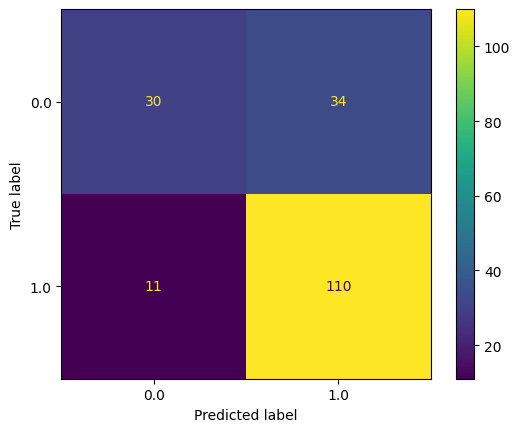

In [116]:
cm = confusion_matrix(y_test2, y_pred_extra_tree2, labels= extra_tree_classifier2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= extra_tree_classifier2.classes_)
disp.plot()
plt.show()

In [117]:
print(classification_report(y_test2, y_pred_extra_tree2))

              precision    recall  f1-score   support

         0.0       0.73      0.47      0.57        64
         1.0       0.76      0.91      0.83       121

    accuracy                           0.76       185
   macro avg       0.75      0.69      0.70       185
weighted avg       0.75      0.76      0.74       185



In [118]:
from imblearn.over_sampling import ADASYN
# adasyn =  ADASYN(sampling_strategy='minority',random_state=0)
#fit ADASYN on original X and y and define resample X and y
X_bal2,y_bal2 = ADASYN(sampling_strategy='minority',random_state=0).fit_resample(X_train2,y_train2)

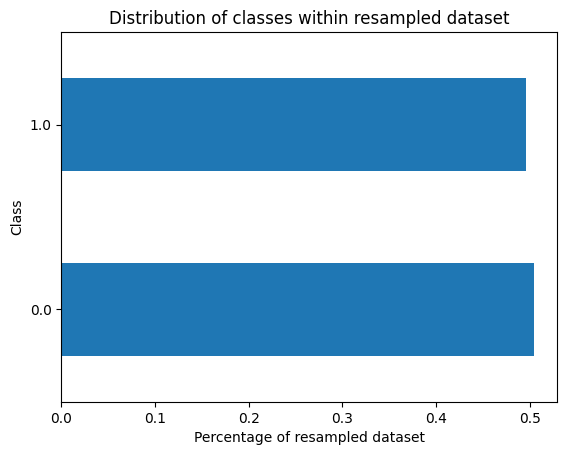

In [119]:
resample2 = pd.Series(y_bal2.value_counts(normalize = True))
ax = resample.plot.barh()
ax.set(title = "Distribution of classes within resampled dataset", xlabel = "Percentage of resampled dataset", ylabel = "Class")
plt.show();

In [122]:
Xre_train2

,Coapplicant_Income,Loan_Amount,Term,Total_income,monthly_debt,Gender_1.0,Married_1.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_1.0,Self_Employed_1.0,Credit_History_1.0,Area_1.0,Area_2.0
472,0.000000,16.179363,5.886104,13.059061,10.293259,0,0,0,0,0,0,0,0,1,0
104,12.197536,16.454568,5.192957,13.015446,11.261611,1,1,1,0,0,1,0,1,0,1
166,0.000000,16.231424,5.886104,12.777335,10.345320,0,0,1,0,0,0,0,1,1,0
3,13.245289,16.749367,5.192957,13.989800,11.556411,1,1,0,1,0,0,0,1,1,0
89,0.000000,16.056220,5.886104,13.071070,10.170116,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,11.544424,14.771022,5.886104,13.384728,8.884918,1,1,1,0,0,0,0,1,1,0
308,15.034480,16.012735,5.886104,15.087320,10.126631,1,0,0,0,0,0,0,1,0,1
467,0.000000,16.070502,4.378721,12.853858,11.691782,1,0,0,0,0,1,0,1,0,0
551,0.000000,16.107135,5.842196,12.383009,10.264939,1,0,0,0,0,1,0,1,0,0


In [124]:
Xre_train2, Xre_test2, yre_train2, yre_test2 = train_test_split(X_bal2, y_bal2)
# extra_re2 = ExtraTreesClassifier()
# extra_re2.fit(Xre_train2, yre_train2)
# predictions2 = extra_re.predict(Xre_test2)
# print(classification_report(yre_test2, predictions2))

In [127]:
extra_tree_re = ExtraTreesClassifier()

In [129]:
extra_tree_re.fit(Xre_train2,yre_train2)

ExtraTreesClassifier()

In [134]:
predictions2_re_tree=extra_tree_re.predict(Xre_test2)
print(classification_report(yre_test2, predictions2_re_tree))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86        76
         1.0       0.87      0.84      0.86        77

    accuracy                           0.86       153
   macro avg       0.86      0.86      0.86       153
weighted avg       0.86      0.86      0.86       153



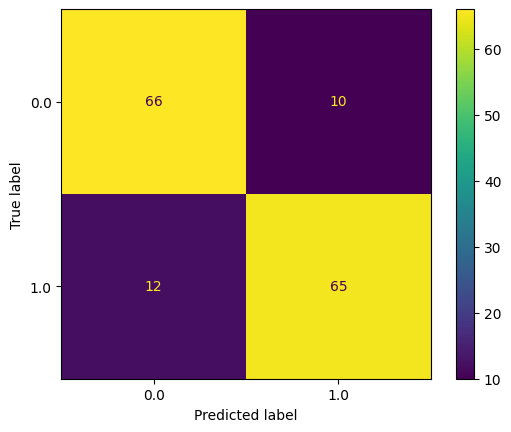

In [135]:
disp = ConfusionMatrixDisplay.from_estimator(extra_tree_re, Xre_test2,yre_test2)
plt.show();

In [61]:
# Logistic Regression
from sklearn.model_selection import KFold, cross_validate,cross_val_score,GridSearchCV,StratifiedKFold
logit = LogisticRegression(
    penalty ='l2', C=10, solver='liblinear')

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
param_grid = dict(
    penalty=['l1', 'l2'],
    C=[0.1, 1, 10],
    max_iter= [100,200,300,400,500,600]
)



clf_logit =  GridSearchCV(
    logit,
   param_grid,
    scoring='accuracy',
    
    cv=kf, # k-fold
    refit=True
)

search_logit = clf_logit.fit(X_train,y_train)
search_logit.best_params_


{'C': 1, 'max_iter': 100, 'penalty': 'l1'}

In [62]:
pd.DataFrame(search_logit.cv_results_)['mean_test_score'].mean()

0.819171606627147

In [63]:
logit2 = LogisticRegression(
    penalty ='l1', C=0.1, solver='liblinear',  max_iter=100)
logit2.fit(X_train,y_train)

y_pred2= logit2.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.7891891891891892


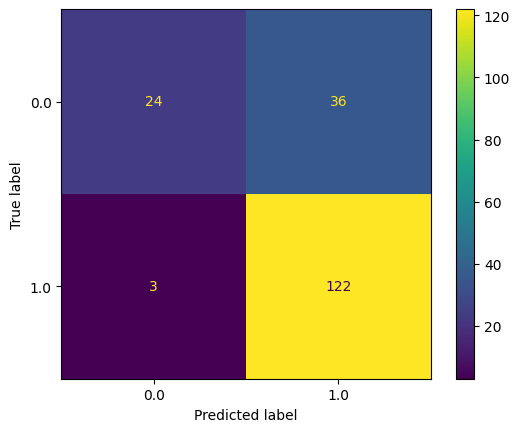

In [64]:
cm = confusion_matrix(y_test, y_pred2, labels= logit2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= logit2.classes_)
disp.plot()
plt.show()

In [65]:
score_ref = (cross_val_score(logit,X_train,y_train,cv=kf,scoring='accuracy').mean())

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
## first find the best estimator using GridSearchCV
n_estimators = [200,250,300,350,400,450,500]
max_features=['auto','sqrt']
max_depth=[5,10,15,20,25]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]

bootstrap=[True,False]

grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_leaf':min_samples_leaf,
    'min_samples_split':min_samples_split,
    'bootstrap':bootstrap
}

grid

{'n_estimators': [200, 250, 300, 350, 400, 450, 500],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'bootstrap': [True, False]}

In [68]:
rf = RandomForestClassifier()
rf_random = GridSearchCV(estimator=rf,param_grid=grid,cv=3,n_jobs=-1)


In [69]:
# search = rf_random.fit(X_train,y_train)

In [70]:
# search.best_estimator_

In [71]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
rf_random = GridSearchCV(estimator=rf,param_grid=grid,cv=kf,n_jobs=-1)
search = rf_random.fit(X_train,y_train)
search.best_estimator_

RandomForestClassifier(max_features='auto', min_samples_split=10,
                       n_estimators=200)

In [72]:
search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [73]:
pd.DataFrame(search.cv_results_)['mean_test_score'].mean()

0.8175960306603263

In [75]:
rf = RandomForestClassifier(max_features='auto',min_samples_leaf=1,n_estimators=200,min_samples_split=10,random_state=123,bootstrap=True)
rf.fit(X_train,y_train)

RandomForestClassifier(max_features='auto', min_samples_split=10,
                       n_estimators=200, random_state=123)

In [76]:
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf))

0.7945945945945946


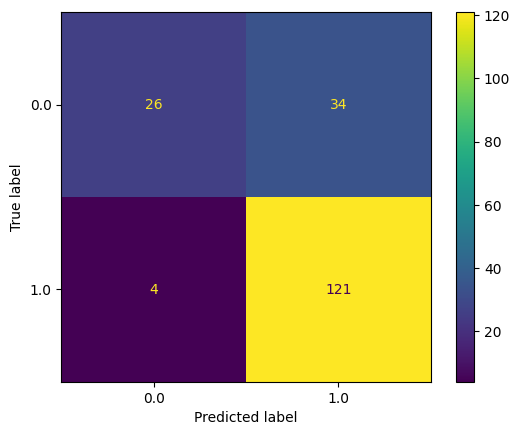

In [77]:
cm = confusion_matrix(y_test, y_pred_rf, labels= rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= rf.classes_)
disp.plot()
plt.show()

In [78]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.87      0.43      0.58        60
         1.0       0.78      0.97      0.86       125

    accuracy                           0.79       185
   macro avg       0.82      0.70      0.72       185
weighted avg       0.81      0.79      0.77       185



In [80]:
# !pip install imblearn

In [81]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [83]:
train = X_train.join(y_train)

In [85]:
print("Data before balancing the class:",train.shape)
print('Count of Status for Yes or No before balancing out the data:')
print(train.Status.value_counts())

## we are doing oversampling of the frauds to balance out the class we have
X_bal,y_bal = ADASYN(sampling_strategy='minority',random_state=0).fit_resample(X_train,y_train)

##joining the data we have
X_bal = pd.DataFrame(X_bal,columns=X_train.columns)
y_bal = pd.DataFrame(y_bal,columns=['Status'])
balanced = X_bal.join(y_bal)

print('--------------')
print('Datashape after applying ADASYN balancing technique:',balanced.shape)
print("Status of Loan whether it is approved or not after balancing:")
print(balanced.Status.value_counts())

Data before balancing the class: (429, 16)
Count of Status for Yes or No before balancing out the data:
1.0    308
0.0    121
Name: Status, dtype: int64
--------------
Datashape after applying ADASYN balancing technique: (610, 16)
Status of Loan whether it is approved or not after balancing:
1.0    308
0.0    302
Name: Status, dtype: int64


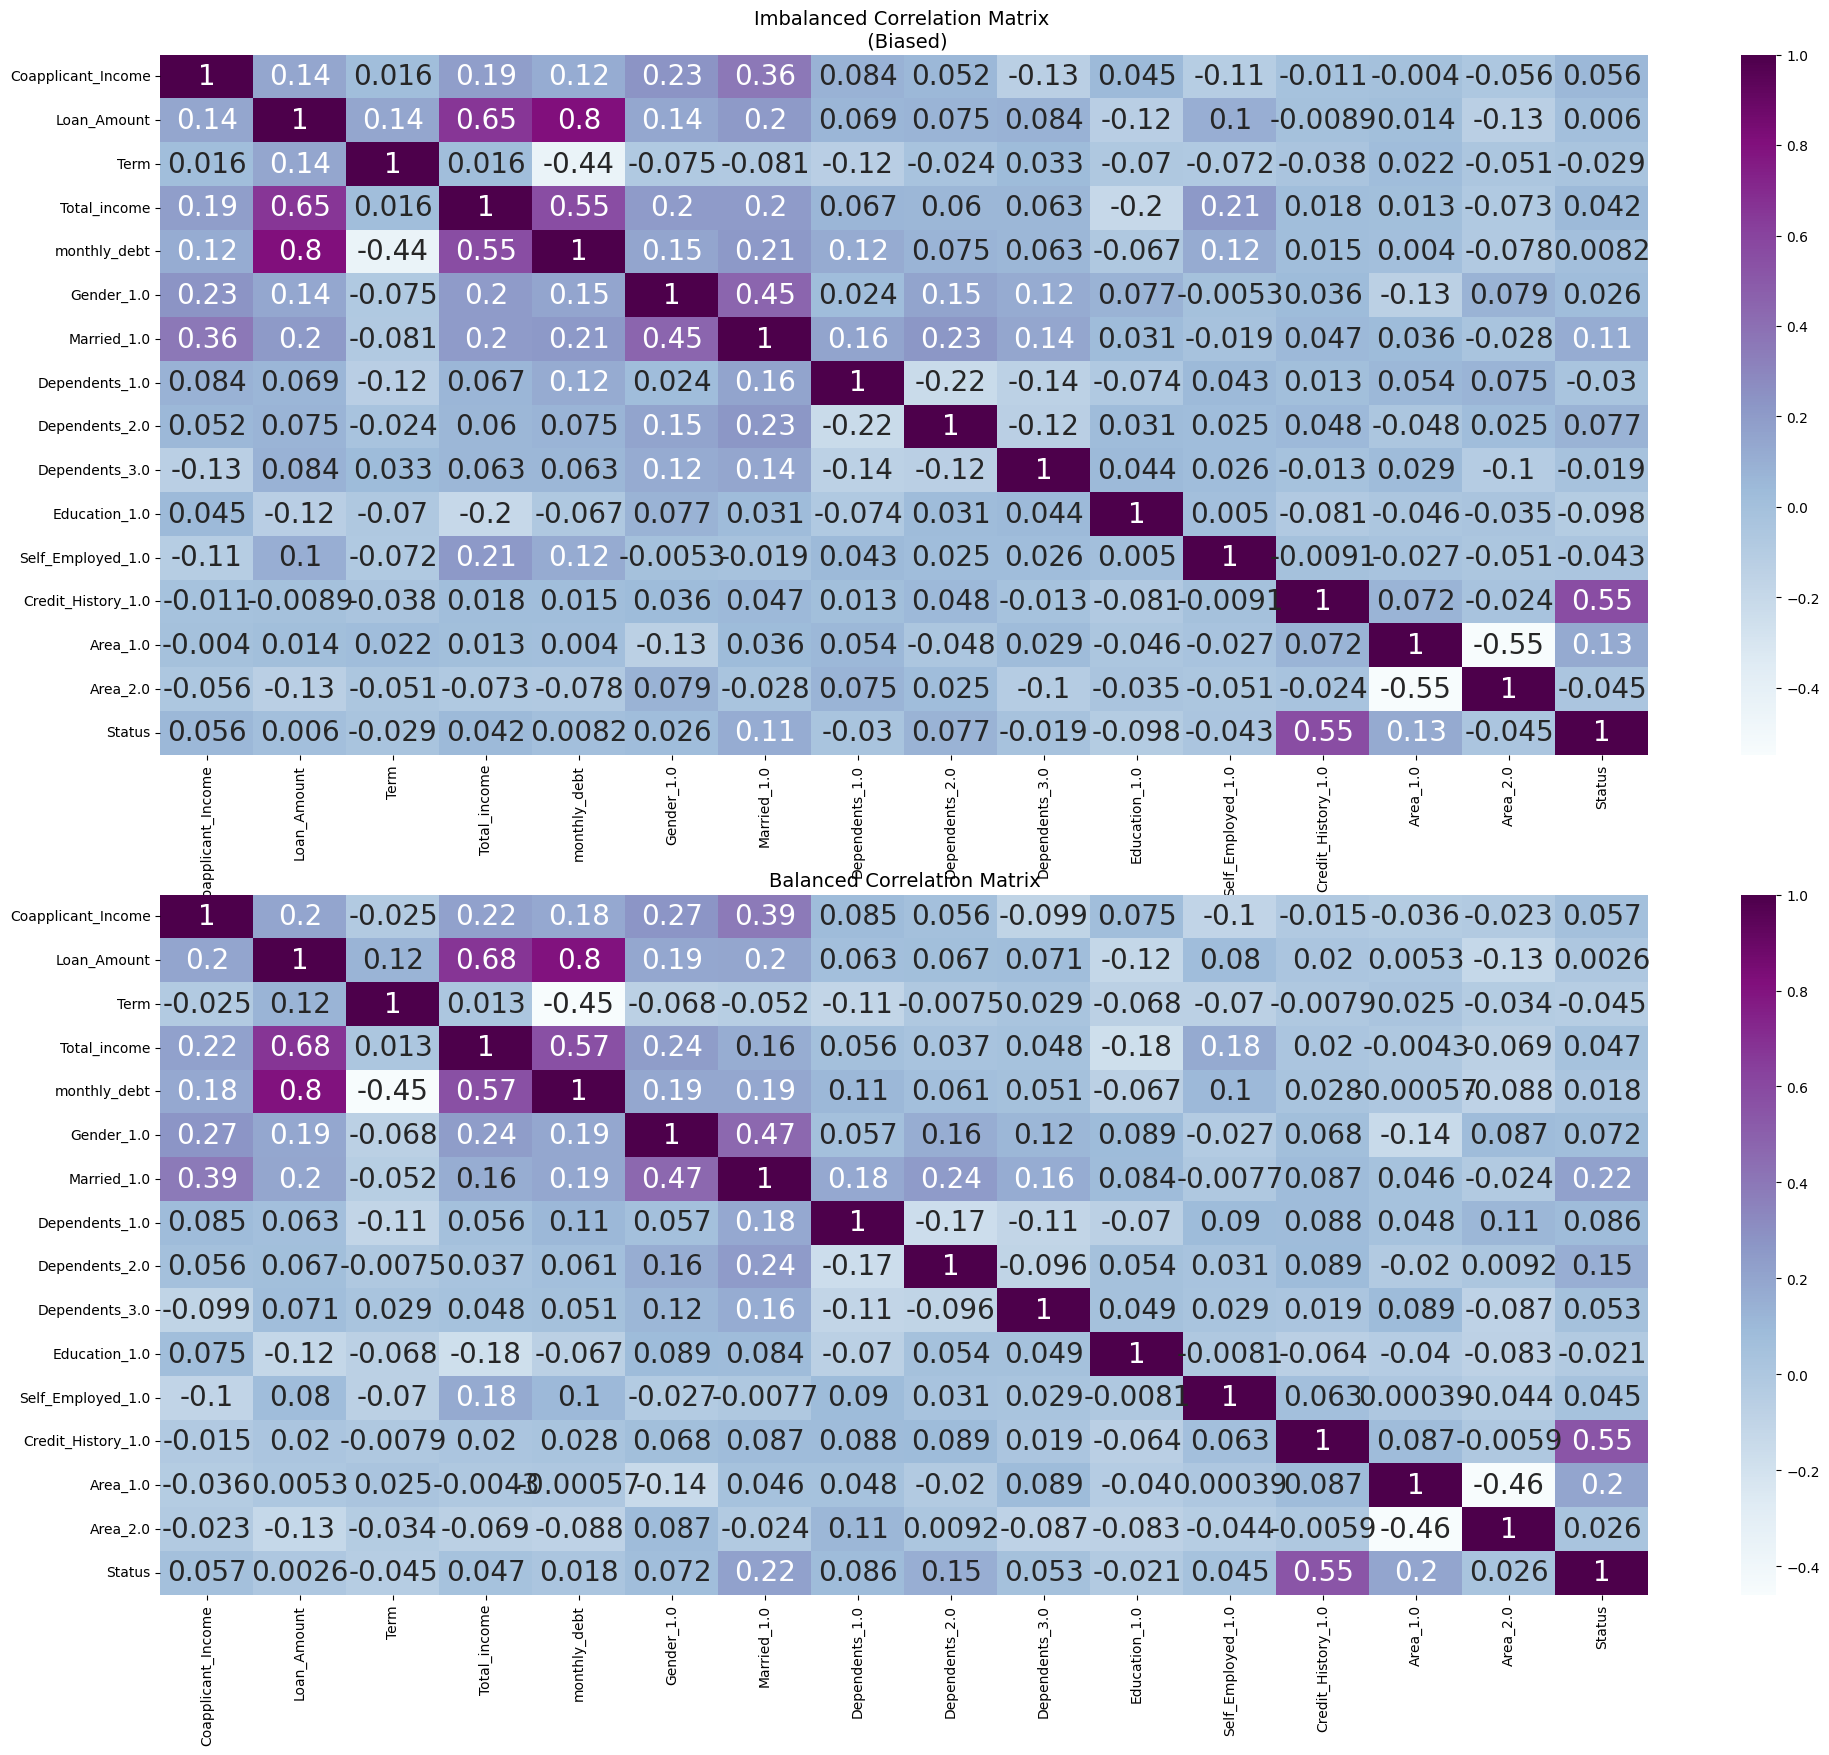

In [91]:
## after balancing the dataset we have, find the correlations among the unbalanced dataset in comparison to balanced one

# Compare correlation of raw train data VS balanced train data

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Imbalanced DataFrame
train.Status = train.Status.astype('float')
corr = train.corr()
sns.heatmap(corr, annot_kws={'size':20}, ax=ax1,cmap='BuPu', annot = True)
ax1.set_title("Imbalanced Correlation Matrix \n (Biased)", fontsize=14)

# Balanced DataFrame
balanced.Status= balanced.Status.astype('float')
bal_corr = balanced.corr()
sns.heatmap(bal_corr, annot_kws={'size':20}, ax=ax2,cmap='BuPu', annot = True)
ax2.set_title('Balanced Correlation Matrix', fontsize=14)
plt.show()

In [92]:
bal_corr.Status

Coapplicant_Income    0.057384
Loan_Amount           0.002635
Term                 -0.045262
Total_income          0.047094
monthly_debt          0.018011
Gender_1.0            0.072380
Married_1.0           0.218743
Dependents_1.0        0.085789
Dependents_2.0        0.153331
Dependents_3.0        0.053192
Education_1.0        -0.021313
Self_Employed_1.0     0.045146
Credit_History_1.0    0.546886
Area_1.0              0.198324
Area_2.0              0.025910
Status                1.000000
Name: Status, dtype: float64

In [93]:
## look for outliers in the data we have
no_outliers = pd.DataFrame(balanced.copy())

In [97]:
cols = bal_corr.Status.index[:-1]

In [108]:
X_train = train.drop(columns='Status')
y_train = train.Status
        
# Logistic Regression
from sklearn.model_selection import KFold, cross_validate,cross_val_score,GridSearchCV,StratifiedKFold
logit = LogisticRegression(
    penalty ='l2', C=10, solver='liblinear')

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
param_grid = dict(
    penalty=['l1', 'l2'],
    C=[0.1, 1, 10],
    max_iter= [100,200,300,400,500,600]
)



clf_logit =  GridSearchCV(
    logit,
   param_grid,
    scoring='accuracy',
    
    cv=kf, # k-fold
    refit=True
)

search_logit = clf_logit.fit(X_train,y_train)
search_logit.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l1'}

In [109]:
logit_balanced = LogisticRegression(
    penalty ='l1', C=1, solver='liblinear',max_iter=100)

logit_balanced.fit(X_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [110]:
y_pred3= logit_balanced.predict(X_test)
print(accuracy_score(y_test,y_pred3))

0.7891891891891892


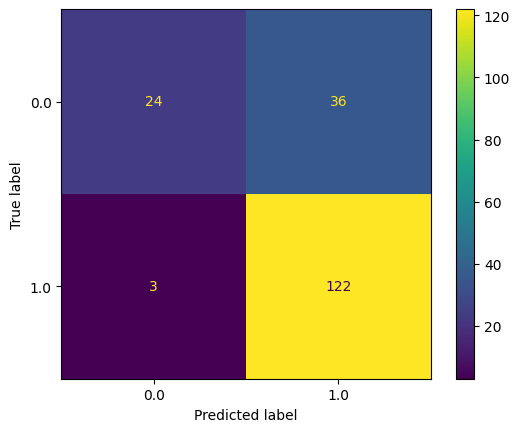

In [111]:
cm = confusion_matrix(y_test, y_pred3, labels= logit_balanced.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= logit_balanced.classes_)
disp.plot()
plt.show()

In [112]:
## first find the best estimator using GridSearchCV
n_estimators = [10,50,100,200,250,300,350,400,450,500]
max_features=['auto','sqrt']
max_depth=[1,3,5,7,9,11,13,15,17,19,21,23]
min_samples_split=[2,3,4,5,6,7,8,9,10,12]
min_samples_leaf=[1,2,4,6,8]

bootstrap=[True,False]

grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_leaf':min_samples_leaf,
    'min_samples_split':min_samples_split,
    'bootstrap':bootstrap
}

grid

rf = RandomForestClassifier()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
rf_random = GridSearchCV(estimator=rf,param_grid=grid,cv=kf,n_jobs=-1)
search = rf_random.fit(X_train,y_train)
search.best_estimator_
search.best_params_

{'bootstrap': False,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 7,
 'n_estimators': 50}

In [132]:
rf_balanced = RandomForestClassifier(max_features='auto',min_samples_leaf=8,n_estimators=50,min_samples_split=7,random_state=61,bootstrap=False)
rf_balanced.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_features='auto', min_samples_leaf=8,
                       min_samples_split=7, n_estimators=50, random_state=61)

In [133]:
y_pred_rf_balanced= rf_balanced.predict(X_test)
print(accuracy_score(y_test,y_pred_rf_balanced))

0.8


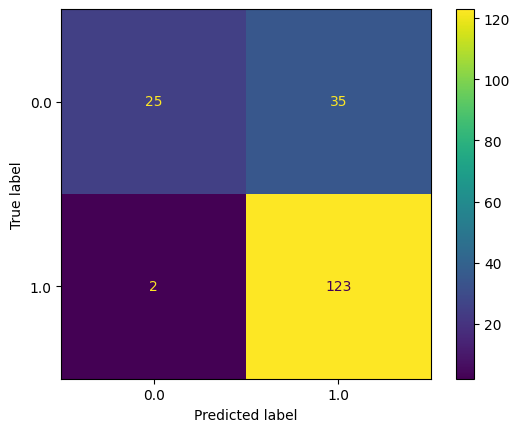

In [134]:
cm = confusion_matrix(y_test, y_pred_rf_balanced, labels= rf_balanced.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= rf_balanced.classes_)
disp.plot()
plt.show()

In [92]:
encoded_impute_data2

,Gender,Married,Dependents,Education,Self_Employed,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status,Total_income,monthly_debt
0,1.0,0.0,0.0,0.0,0.0,0.000000,16.523561,360.0,1.0,2.0,1.0,13.279196,10.637457
1,1.0,1.0,1.0,0.0,0.0,11.923710,16.364956,360.0,1.0,0.0,0.0,13.319738,10.478852
2,1.0,1.0,0.0,0.0,1.0,0.000000,15.702580,360.0,1.0,2.0,1.0,12.611538,9.816476
3,1.0,1.0,0.0,1.0,0.0,12.370739,16.300417,360.0,1.0,2.0,1.0,13.110493,10.414313
4,1.0,0.0,0.0,0.0,0.0,0.000000,16.461685,360.0,1.0,2.0,1.0,13.304685,10.575581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,0.000000,15.775605,360.0,1.0,0.0,1.0,12.577636,9.889501
610,1.0,1.0,3.0,0.0,0.0,0.000000,15.201805,180.0,1.0,0.0,1.0,12.925375,10.008848
611,1.0,1.0,1.0,0.0,0.0,10.085809,17.046315,360.0,1.0,2.0,1.0,13.630626,11.160211
612,1.0,1.0,2.0,0.0,0.0,0.000000,16.744034,360.0,1.0,2.0,1.0,13.538834,10.857930


In [109]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=123)
for train_index, test_index in split.split(encoded_impute_data2,encoded_impute_data2['Status']):
    strat_train_set = encoded_impute_data2.loc[train_index]
    strat_test_set = encoded_impute_data2.loc[test_index]

In [110]:
strat_test_set['Status'].value_counts()/len(strat_test_set)

1.0    0.702703
0.0    0.297297
Name: Status, dtype: float64

In [111]:
encoded_impute_data2['Status'].value_counts()/len(encoded_impute_data2)

1.0    0.705212
0.0    0.294788
Name: Status, dtype: float64

In [112]:
X_train = strat_train_set.drop(columns='Status')
y_train= strat_train_set['Status']
X_test = strat_test_set.drop(columns='Status')
y_test = strat_test_set['Status']

In [113]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(429, 12) (185, 12) (429,) (185,)


In [114]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
X_train = pd.get_dummies(X_train,drop_first=True)

In [118]:
features = scaler.fit_transform(X_train[feature_numeric])

In [120]:
X_train[feature_numeric] = features

In [121]:
X_train

,Coapplicant_Income,Loan_Amount,Term,Total_income,monthly_debt,Gender_1.0,Married_1.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_1.0,Self_Employed_1.0,Credit_History_1.0,Area_1.0,Area_2.0
436,0.818997,-1.974794,0.252699,-0.850480,-1.888684,1,0,0,0,0,0,0,1,1,0
276,0.912894,0.993780,0.252699,0.421280,0.751609,1,1,0,0,0,0,0,1,1,0
151,0.935244,0.348456,0.252699,0.152091,0.177648,1,1,0,0,0,0,1,1,0,0
372,1.057361,2.263065,-0.753564,2.095159,2.219365,1,1,0,1,0,0,1,1,0,0
342,0.751570,0.429351,0.252699,-0.022624,0.249597,1,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,1.042877,0.747670,0.252699,1.292220,0.532715,1,0,0,0,0,0,0,1,0,1
355,-1.177964,-0.216322,-2.766090,-0.832045,0.963507,0,0,0,0,0,0,0,1,0,1
491,0.737888,0.770259,0.252699,0.193722,0.552807,1,1,1,0,0,1,0,1,0,1
173,1.002003,0.781463,0.252699,1.284860,0.562772,1,1,0,0,0,0,0,1,1,0


In [123]:
rf2 = RandomForestClassifier()
rf_random2 = GridSearchCV(estimator=rf,param_grid=grid,cv=3,n_jobs=-1)

In [124]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
rf_random2 = GridSearchCV(estimator=rf2,param_grid=grid,cv=kf,n_jobs=-1)
search2 = rf_random2.fit(X_train,y_train)
search2.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, n_estimators=250)

In [125]:
search2.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 250}

In [126]:
rf2 = RandomForestClassifier(max_features='sqrt',min_samples_leaf=2,n_estimators=250,min_samples_split=2,random_state=123,bootstrap=False)
rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, n_estimators=250,
                       random_state=123)

In [129]:
X_test = pd.get_dummies(X_test,drop_first=True)
X_test[feature_numeric]

,Coapplicant_Income,Loan_Amount,Term,Total_income,monthly_debt
313,0.000000,16.482739,84.0,13.261429,12.051922
34,12.611538,17.281246,360.0,14.253765,11.395142
354,10.829729,16.380460,360.0,12.587245,10.494356
95,12.007536,16.499392,342.0,13.465231,10.664582
456,0.000000,16.283610,360.0,12.971773,10.397506
...,...,...,...,...,...
533,0.000000,16.791040,360.0,13.933294,10.904936
413,12.222438,16.213406,360.0,12.968279,10.327302
338,12.007536,16.499392,342.0,13.465231,10.664582
157,0.000000,16.744034,360.0,13.768209,10.857930


In [130]:
features_test = scaler.fit_transform(X_test[feature_numeric])
X_test[feature_numeric]=features_test
X_test

,Coapplicant_Income,Loan_Amount,Term,Total_income,monthly_debt,Gender_1.0,Married_1.0,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_1.0,Self_Employed_1.0,Credit_History_1.0,Area_1.0,Area_2.0
313,-1.103921,0.179830,-3.494085,-0.052342,2.358768,1,1,0,1,0,0,1,1,0,0
34,0.933074,1.673494,0.341161,1.655956,1.282852,1,0,0,0,1,0,0,1,0,0
354,0.645279,-0.011489,0.341161,-1.212944,-0.192789,0,1,0,0,0,0,0,1,1,0
95,0.835517,0.210982,0.091036,0.298500,0.086070,1,1,1,0,0,0,0,1,1,0
456,-1.103921,-0.192654,0.341161,-0.550983,-0.351446,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,-1.103921,0.756530,0.341161,1.104266,0.479811,1,0,1,0,0,0,0,1,1,0
413,0.870227,-0.323975,0.341161,-0.556997,-0.466452,1,1,0,0,0,1,0,1,0,0
338,0.835517,0.210982,0.091036,0.298500,0.086070,1,1,1,0,0,0,0,1,1,0
157,-1.103921,0.668601,0.341161,0.820075,0.402807,1,1,1,0,0,0,0,1,0,1


In [131]:
y_pred = rf2.predict(X_test)

In [132]:
print(accuracy_score(y_test,y_pred))

0.772972972972973


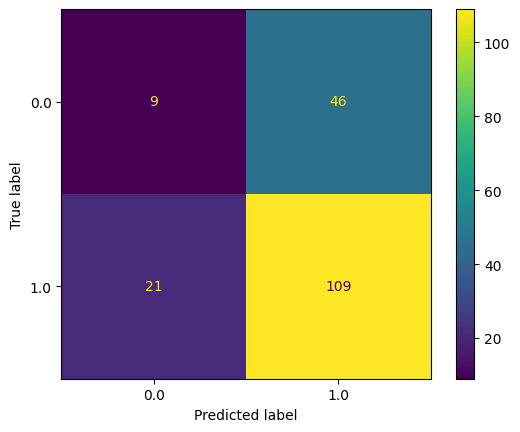

In [133]:
cm = confusion_matrix(y_test, y_pred_rf, labels= rf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= rf2.classes_)
disp.plot()
plt.show()

In [134]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.30      0.16      0.21        55
         1.0       0.70      0.84      0.76       130

    accuracy                           0.64       185
   macro avg       0.50      0.50      0.49       185
weighted avg       0.58      0.64      0.60       185



In [83]:
# loan_data['Total_Income'] = loan_data['Applicant_Income']+loan_data['Coapplicant_Income']


In [84]:
# loan_data.drop(columns='ratio',inplace=True)

In [85]:
# loan_data['monthly_income']= loan_data['Total_Income']/12
# loan_data['monthly_debt']=loan_data['Loan_Amount']/loan_data['Term']
# loan_data.head()

In [86]:
# loan_data[loan_data['monthly_debt']/loan_data['monthly_income']<0.60]